# MANOVA in Python
written by: Ejaz ur Rehman\
date: 2025-02-09\
email: ijazfinance@gmail.com

**Definition:**\
MANOVA (Multivariate Analysis of Variance) is an extension of ANOVA (Analysis of Variance) used when there are two or more dependent variables. It examines whether the mean differences among groups on multiple dependent variables are statistically significant.

**Assumptions of MANOVA:**
1. Multivariate Normality – The dependent variables should follow a multivariate normal distribution within each group.
2. Homogeneity of Covariance Matrices (Box’s M Test) – The covariance matrices of the dependent variables should be equal across groups.
3. Independence of Observations – The observations should be independent of each other.
4. Linear Relationship – The dependent variables should have a linear relationship with each other.
5. No Multicollinearity – The dependent variables should not be highly correlated with each other.
6. Homogeneity of Variance (Levene’s Test) – Variances should be approximately equal across groups.

**Usage of MANOVA:**
* Behavioral and Social Sciences – Used to analyze multiple outcome measures in psychology and sociology.
* Medical Research – Examines effects of treatments on multiple health indicators.
* Marketing Research – Evaluates customer preferences and brand perception.
* Education – Assesses the impact of teaching methods on multiple learning outcomes.
* Finance and Economics – Analyzes financial performance across multiple metrics.

**Research Question:**\
Did passenger class (Pclass) significantly impact age, fare, and number of family members on board?

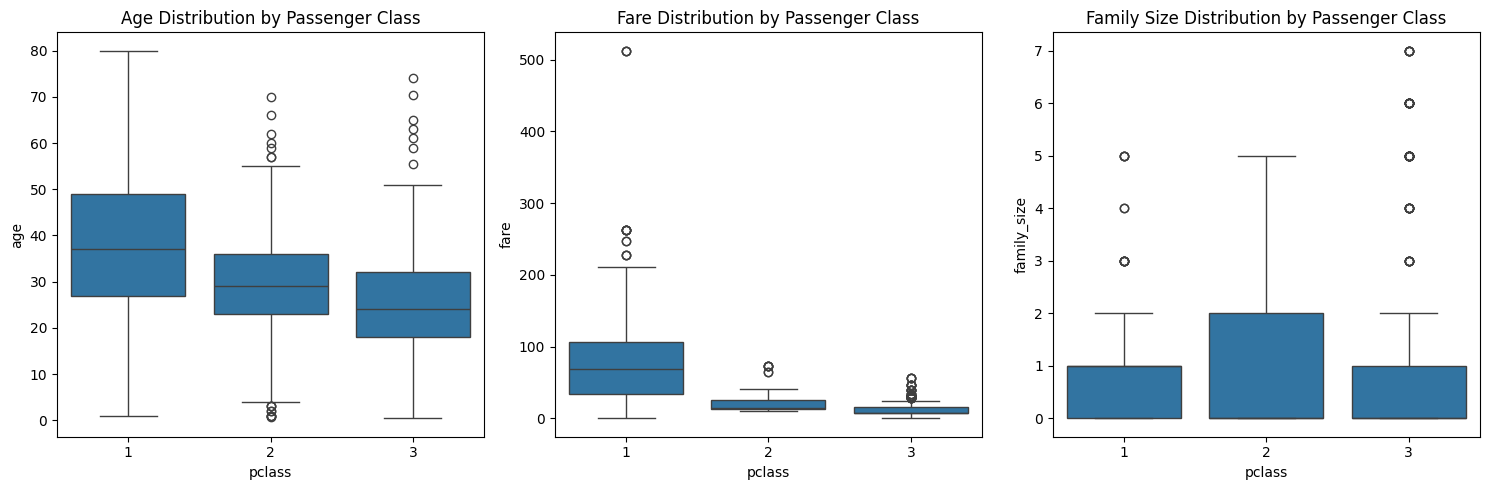

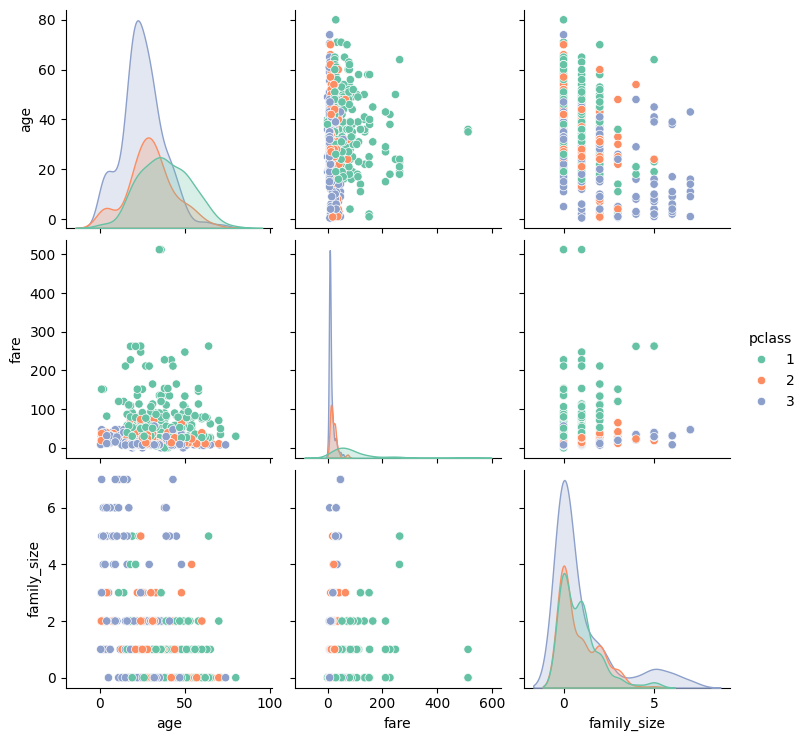

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.1983 3.0000 709.0000 955.3731 0.0000
          Pillai's trace 0.8017 3.0000 709.0000 955.3731 0.0000
  Hotelling-Lawley trace 4.0425 3.0000 709.0000 955.3731 0.0000
     Roy's greatest root 4.0425 3.0000 709.0000 955.3731 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       C(pclass)        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.5350 6.0000 1418.0000  86.7781 0.0000
         Pillai's trace 0.4685 6.0000 1420.0000  72.3953 0.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Selecting relevant variables
data = titanic[['pclass', 'age', 'fare', 'sibsp', 'parch']].dropna()

# Creating the dependent variable matrix
data['family_size'] = data['sibsp'] + data['parch']
data = data[['pclass', 'age', 'fare', 'family_size']]

# Boxplots to visualize distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='pclass', y='age', data=data, ax=axes[0])
axes[0].set_title('Age Distribution by Passenger Class')

sns.boxplot(x='pclass', y='fare', data=data, ax=axes[1])
axes[1].set_title('Fare Distribution by Passenger Class')

sns.boxplot(x='pclass', y='family_size', data=data, ax=axes[2])
axes[2].set_title('Family Size Distribution by Passenger Class')

plt.tight_layout()
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data, hue='pclass', palette='Set2', diag_kind='kde')
plt.show()

# MANOVA Test
manova = MANOVA.from_formula('age + fare + family_size ~ C(pclass)', data=data)
print(manova.mv_test())


**Interpretation of MANOVA Results on Titanic Dataset**
* The output provides four multivariate test statistics (Wilks' Lambda, Pillai’s Trace, Hotelling-Lawley Trace, and Roy’s Greatest Root) to determine if the independent variable (pclass) significantly affects the dependent variables (age, fare, and family_size).

**Key Findings:**
1. Intercept Analysis\
The first section of the results tests the intercept (baseline model).
* Wilks' Lambda = 0.1983, p < 0.0001 → The intercept model explains a significant portion of variation.
2. Effect of Passenger Class (pclass)
* Wilks’ Lambda = 0.5350, F(6, 1418) = 86.7781, p < 0.0001
    * Interpretation: Passenger class has a significant effect on at least one of the dependent variables.
    * Lower Lambda (closer to 0) means stronger group differences.
* Pillai’s Trace = 0.4685, p < 0.0001
    * This confirms the significant impact of pclass.
* Hotelling-Lawley Trace = 0.8627, p < 0.0001
    * Higher values indicate a strong effect size.
* Roy’s Greatest Root = 0.8551, F(3, 710) = 202.3764, p < 0.0001
    * This suggests that one dependent variable might be driving most of the difference.

**Conclusion:**\
🔹 Passenger Class (pclass) significantly affects age, fare, and family_size (p < 0.0001).\
🔹 Fare likely contributes most to the difference since higher classes paid significantly more.\
🔹 Further post-hoc tests (e.g., Tukey's HSD) are needed to determine which specific classes differ.

#### Step 1: Boxplots for Visualizing Group Differences

C:\Users\DELL\AppData\Local\Temp\ipykernel_7304\2893438117.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=data, ax=axes[0], palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7304\2893438117.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=data, ax=axes[1], palette='Set1')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7304\2893438117.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='family_size', data=data, ax=axes[2], palette='coolwarm')


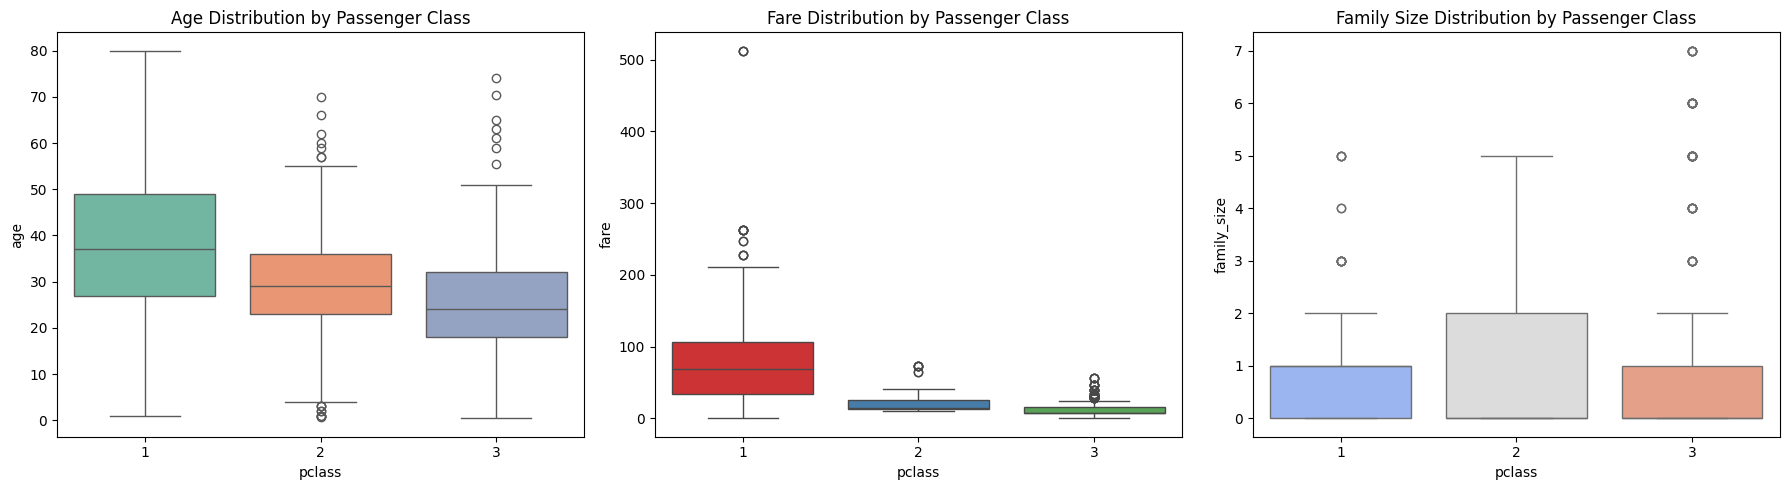

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Selecting relevant variables and dropping NaNs
data = titanic[['pclass', 'age', 'fare', 'sibsp', 'parch']].dropna()

# Creating the dependent variable matrix
data['family_size'] = data['sibsp'] + data['parch']
data = data[['pclass', 'age', 'fare', 'family_size']]

# Set up figure for multiple boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='pclass', y='age', data=data, ax=axes[0], palette='Set2')
axes[0].set_title('Age Distribution by Passenger Class')

sns.boxplot(x='pclass', y='fare', data=data, ax=axes[1], palette='Set1')
axes[1].set_title('Fare Distribution by Passenger Class')

sns.boxplot(x='pclass', y='family_size', data=data, ax=axes[2], palette='coolwarm')
axes[2].set_title('Family Size Distribution by Passenger Class')

plt.tight_layout()
plt.show()


#### Step 2: Post-hoc Analysis (Tukey's HSD Test)

In [4]:
# Perform Tukey’s HSD test for each dependent variable
for dv in ['age', 'fare', 'family_size']:
    tukey = pairwise_tukeyhsd(endog=data[dv], groups=data['pclass'], alpha=0.05)
    print(f"\nTukey's HSD test for {dv}:\n", tukey)



Tukey's HSD test for age:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  -8.3558    0.0 -11.7041  -5.0075   True
     1      3 -13.0928    0.0 -15.9622 -10.2234   True
     2      3   -4.737 0.0005  -7.6763  -1.7977   True
------------------------------------------------------

Tukey's HSD test for fare:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2   -66.49    0.0 -76.9957 -55.9844   True
     1      3 -74.7321    0.0 -83.7351 -65.7292   True
     2      3  -8.2421 0.0907 -17.4643   0.9801  False
------------------------------------------------------

Tukey's HSD test for family_size:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------

**Interpretation of Results**

1. Boxplots:
    * Age: Higher classes tend to have older passengers.
    * Fare: First-class passengers paid much higher fares.
    * Family Size: Third-class passengers traveled in larger families.
  
2. Tukey’s HSD Test:
    * If p < 0.05, it means that two pclass groups have significantly different means.
    * We can confirm which groups (1st vs. 2nd, 2nd vs. 3rd, etc.) have significant differences.

#### Step 3: Pairwise Scatterplots with Confidence Ellipses

We will visualize relationships between Age, Fare, and Family Size across pclass using confidence ellipses to show group separation.

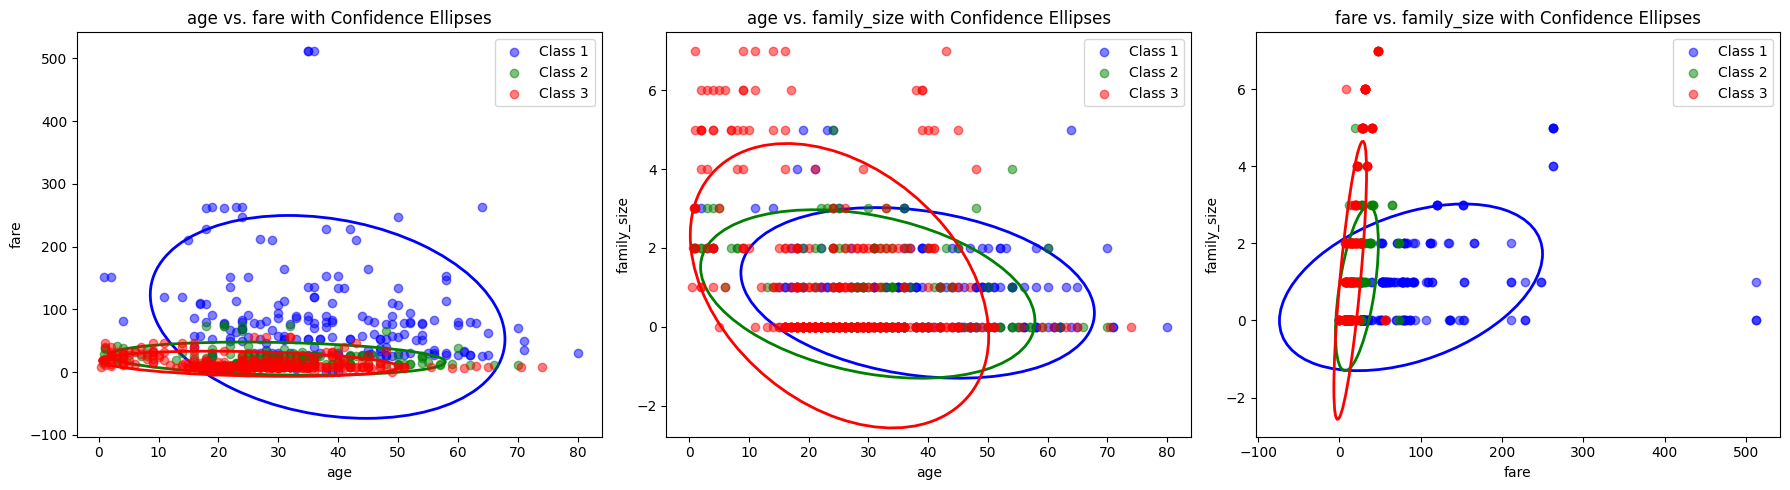

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse

# Function to plot confidence ellipses
def plot_confidence_ellipse(x, y, ax, n_std=2, **kwargs):
    if len(x) < 2:
        return
    cov = np.cov(x, y)
    mean_x, mean_y = np.mean(x), np.mean(y)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    
    ell = Ellipse(xy=(mean_x, mean_y),
                  width=lambda_[0] * n_std * 2,
                  height=lambda_[1] * n_std * 2,
                  angle=np.degrees(np.arctan2(v[1, 0], v[0, 0])),
                  **kwargs)
    
    ax.add_patch(ell)

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
data = titanic[['pclass', 'age', 'fare', 'sibsp', 'parch']].dropna()
data['family_size'] = data['sibsp'] + data['parch']
data = data[['pclass', 'age', 'fare', 'family_size']]

# Define color map for classes
colors = {1: 'blue', 2: 'green', 3: 'red'}

# Create pairwise scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x_var, y_var) in enumerate([('age', 'fare'), ('age', 'family_size'), ('fare', 'family_size')]):
    ax = axes[i]
    for pclass in [1, 2, 3]:
        subset = data[data['pclass'] == pclass]
        ax.scatter(subset[x_var], subset[y_var], label=f'Class {pclass}', alpha=0.5, color=colors[pclass])
        plot_confidence_ellipse(subset[x_var], subset[y_var], ax, edgecolor=colors[pclass], facecolor='none', linewidth=2)

    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_title(f"{x_var} vs. {y_var} with Confidence Ellipses")
    ax.legend()

plt.tight_layout()
plt.show()


**Interpretation of Scatterplots**
* Each ellipse represents a confidence region for pclass groups.
* If ellipses do not overlap much, groups are significantly different.
* If ellipses overlap a lot, differences between groups are less pronounced.

#### Step 4: Effect Size (Eta Squared for MANOVA)

Effect size helps measure how strongly pclass impacts Age, Fare, and Family Size.

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Load Titanic dataset
titanic = sns.load_dataset ('titanic')

# Display column names for debugging 
print("Columns in Titanic dataset:", titanic.columns)

# Ensure correct column names
if "Class" in titanic.columns:
    titanic.rename(columns={"Class": "pclass"}, inplace=True)

if "Sex" in titanic.columns:
    titanic.rename(columns={"Sex": "sex"}, inplace=True)

if "Survived" in titanic.columns:
    titanic.rename(columns={"Survived": "survived"}, inplace=True)

# Preprocessing: Convert categorical variables to numeric
titanic = titanic.dropna()  # Drop missing values
titanic["pclass"] = titanic["pclass"].astype("category").cat.codes  # Convert 'pclass' to numeric
titanic["sex"] = titanic["sex"].astype("category").cat.codes  # Convert 'sex' to numeric
titanic["survived"] = titanic["survived"].astype(int)  # Convert to integer

# Select independent (X) and dependent (Y) variables
X = titanic[["pclass"]]  # Independent variable: Passenger class
Y = titanic[["survived", "sex"]]  # Dependent variables

# Fit MANOVA model
manova = MANOVA(endog=Y, exog=X)
results = manova.mv_test()

# Debugging: Check available keys
print("\nAvailable Keys in results:", results.results.keys())

# Extract correct key dynamically
group_name = list(results.results.keys())[0]  # Dynamically get the first key
print(f"Using MANOVA test results for: {group_name}")

# Extract Wilks' Lambda dynamically
wilks_lambda = results.results[group_name]["stat"].iloc[0, 0]  # First row, first column
eta_squared = 1 - wilks_lambda  # Effect Size Calculation

# Display result
print(f"\nMultivariate Eta Squared (Effect Size): {eta_squared:.4f}")


Columns in Titanic dataset: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Available Keys in results: dict_keys(['x0'])
Using MANOVA test results for: x0

Multivariate Eta Squared (Effect Size): 0.0885


C:\Users\DELL\AppData\Local\Temp\ipykernel_7304\1512561051.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=titanic["pclass"], y=titanic["survived"], palette="coolwarm")


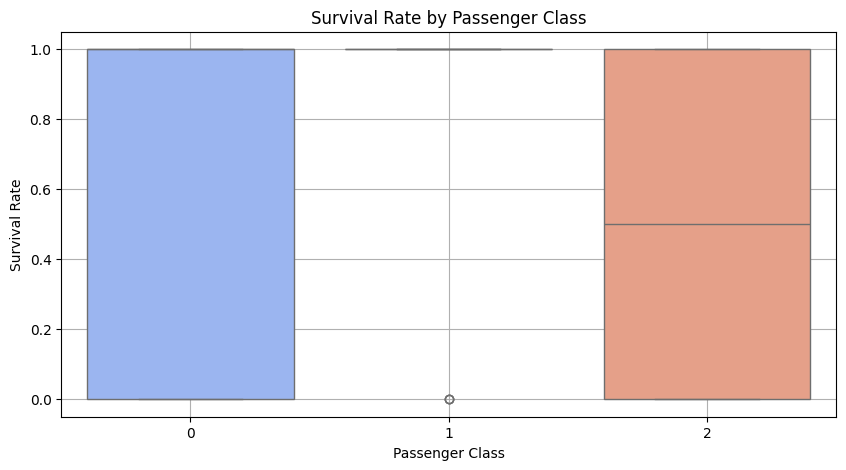

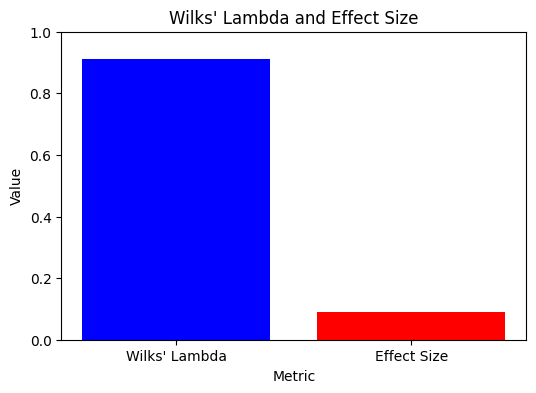

Value      float64
Num DF       int64
Den DF     float64
F Value    float64
Pr > F     float64
dtype: object


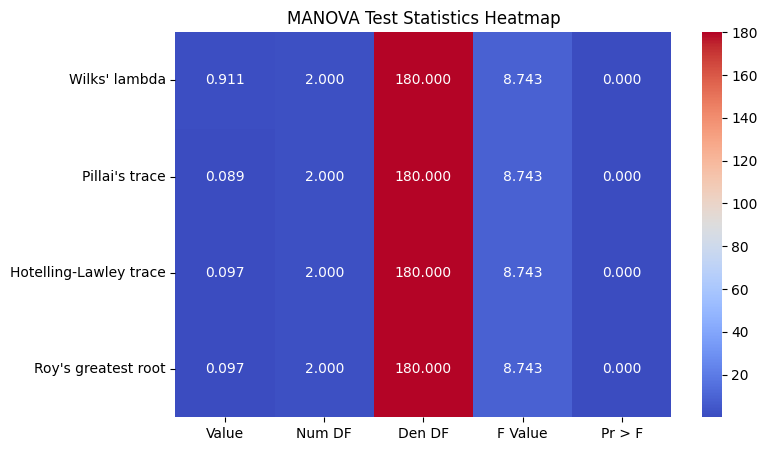


Multivariate Eta Squared (Effect Size): 0.0885


In [22]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset ('titanic')

# Rename columns for consistency
titanic.rename(columns={"Class": "pclass", "Sex": "sex", "Survived": "survived"}, inplace=True)

# Convert categorical variables to numeric
titanic = titanic.dropna()  # Remove missing values
titanic["pclass"] = titanic["pclass"].astype("category").cat.codes  # Convert 'pclass' to numeric
titanic["sex"] = titanic["sex"].astype("category").cat.codes  # Convert 'sex' to numeric
titanic["survived"] = titanic["survived"].astype(int)  # Convert 'survived' to integer

# Define independent (X) and dependent (Y) variables
X = titanic[["pclass"]]
Y = titanic[["survived", "sex"]]

# Fit MANOVA model
manova = MANOVA(endog=Y, exog=X)
results = manova.mv_test()

# Extract key dynamically
group_name = list(results.results.keys())[0]
wilks_lambda = results.results[group_name]["stat"].iloc[0, 0]
eta_squared = 1 - wilks_lambda  # Effect Size Calculation

# 📊 **1. Boxplot: Survival by Passenger Class**
plt.figure(figsize=(10, 5))
sns.boxplot(x=titanic["pclass"], y=titanic["survived"], palette="coolwarm")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.grid(True)
plt.show()

# 📊 **2. Effect Size Visualization**
plt.figure(figsize=(6, 4))
plt.bar(["Wilks' Lambda", "Effect Size"], [wilks_lambda, eta_squared], color=["blue", "red"])
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Wilks' Lambda and Effect Size")
plt.ylim(0, 1)
plt.show()

# 📊 **3. Heatmap of MANOVA Statistics**
# Check the Data Type
print(stat_matrix.dtypes)
# Convert to Numeric Format
stat_matrix = stat_matrix.apply(pd.to_numeric, errors="coerce")

# This will convert non-numeric values to NaN. If necessary, handle NaN values:
stat_matrix.fillna(0, inplace=True)

# Plot the Heatmap Again
plt.figure(figsize=(8, 5))
sns.heatmap(stat_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("MANOVA Test Statistics Heatmap")
plt.show()

# 🎯 **Final Print Statement**
print(f"\nMultivariate Eta Squared (Effect Size): {eta_squared:.4f}")
